In [15]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import re
import os
os.chdir('../')

In [4]:
real = pd.read_csv('data/datasets/true.csv')
fake = pd.read_csv('data/datasets/fake.csv')

In [5]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [9]:
def check_data(df):
    print('Missing Values:', df.isnull().sum())
    df.drop_duplicates()
    print('Duplicates Droped!')
    df.info()

check_data(real)
print('*'*45)
check_data(fake)

Missing Values: title      0
text       0
subject    0
date       0
dtype: int64
Duplicates Droped!
<class 'pandas.core.frame.DataFrame'>
Index: 21211 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21211 non-null  object
 1   text     21211 non-null  object
 2   subject  21211 non-null  object
 3   date     21211 non-null  object
dtypes: object(4)
memory usage: 828.6+ KB
*********************************************
Missing Values: title      0
text       0
subject    0
date       0
dtype: int64
Duplicates Droped!
<class 'pandas.core.frame.DataFrame'>
Index: 23478 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23478 non-null  object
 1   text     23478 non-null  object
 2   subject  23478 non-null  object
 3   date     23478 non-null  object
dtypes: object(4)
memory usage: 917.1+ KB


In [10]:
real['label'] = 1
fake['label'] = 0

In [11]:
df = pd.concat([real, fake]).reset_index(drop=True)
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


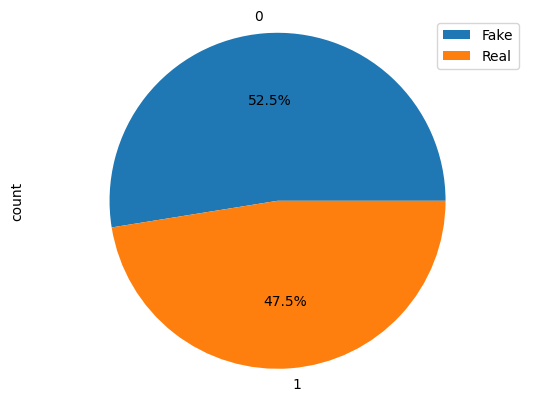

In [13]:
df['label'].value_counts().plot.pie(autopct='%1.1f%%')
plt.axis('equal')
plt.legend(['Fake', 'Real'])
plt.show()

We don't need the `title`, `date` and `subject` so we can just drop these!

In [14]:
df = df[['text', 'label']]
df.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [ ]:
def clean_text(text):
  text = text.lower()
  text = re.sub(r'<[^>]+>', '', text)
  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub(r'\d+', '', text)

  return text

df['text'] = df['text'].apply(clean_text)
df['text'][0]

In [17]:
df.to_csv('processed_data.csv', index=False, header=True)